In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score

from matplotlib import pyplot as plt

from data_handler import TrainDataHandler


TRAIN_VARIANTS_PATH = "../data/training_variants/training_variants"
TRAIN_TEXT_PATH = "../data/training_text/training_text"


# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2   

In [2]:
train_data_handler = TrainDataHandler(TRAIN_VARIANTS_PATH, TRAIN_TEXT_PATH)

2022-12-17 08:09:11 | DEBUG    | data_handler         | Loading the train variants data..
2022-12-17 08:09:11 | DEBUG    | data_handler         | Loading the train text data..
2022-12-17 08:09:12 | DEBUG    | data_handler         | Preparing train data ..
2022-12-17 08:09:12 | INFO     | data_handler         | Train data is loaded. (Data size: (3316, 5))


In [3]:
train_data_handler.train_data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [4]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    train_data_handler.train_data['Text'], train_data_handler.train_data['Class'], 
    test_size=0.2, random_state=0, stratify=train_data_handler.train_data['Class']
)

# vectorize the text
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [7]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train, y_train = rus.fit_resample(X_train, y_train)

# train the model
model = RandomForestClassifier()

model.fit(X_train, y_train)

# predict the test data
y_pred = model.predict(X_test)

# evaluate the model    
for evaluation_metric in [accuracy_score, balanced_accuracy_score, precision_score, recall_score]:
    print(f"{evaluation_metric.__name__}: {evaluation_metric(y_test, y_pred)}")

accuracy_score: 0.3569277108433735
balanced_accuracy_score: 0.3884076866444559


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
# # undersampling
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)

# X = train_data_handler.train_data.drop(["Class", "ID", "Gene", "Variation"], axis=1)
# y = train_data_handler.train_data["Class"]

# X_resampled, y_resampled = rus.fit_resample(X, y)

# X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
# y_resampled = pd.DataFrame(y_resampled, columns=["Class"])

# train_data = pd.concat([X_resampled, y_resampled], axis=1)

# from exploratory_data_analysis import plot_class_distribution

# plot_class_distribution(train_data, percentage_text=False)
# # train_data["Class"].value_counts().plot(kind="bar")

In [15]:
# train the models
model_svc = SVC()
model_rf = RandomForestClassifier()
model_lr = LogisticRegression(max_iter=1000)
model_nb = MultinomialNB()
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_ada = AdaBoostClassifier()
model_gbc = GradientBoostingClassifier()
model_et = ExtraTreesClassifier()
model_bag = BaggingClassifier()
model_mlp = MLPClassifier()
model_gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
model_gnb = GaussianNB()

classifiers = [
    model_svc,
    model_rf,
    # model_lr,
    # model_nb,
    # model_knn,
    # model_dt,
    # model_ada,
    model_gbc,
    # model_et,
    # model_bag,
    model_mlp,
]

for classifier in classifiers:
    print("Fitting classifier: ", classifier)
    classifier.fit(X_train, y_train)

Fitting classifier:  SVC()
Fitting classifier:  RandomForestClassifier()
Fitting classifier:  GradientBoostingClassifier()
Fitting classifier:  MLPClassifier()


c:\Users\ibrah\anaconda3\envs\MyDeepLearning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# predict the test data
pred = {}
for classifier in classifiers:
    print("Predicting with classifier: ", classifier)
    pred[classifier.__class__.__name__] = classifier.predict(X_test)

Predicting with classifier:  SVC()
Predicting with classifier:  RandomForestClassifier()
Predicting with classifier:  GradientBoostingClassifier()
Predicting with classifier:  MLPClassifier()


In [17]:
for classifier in classifiers:
    print("Accuracy score for classifier: ", classifier)
    print(accuracy_score(y_test, pred[classifier.__class__.__name__]))

Accuracy score for classifier:  SVC()
0.4066265060240964
Accuracy score for classifier:  RandomForestClassifier()
0.3689759036144578
Accuracy score for classifier:  GradientBoostingClassifier()
0.2575301204819277
Accuracy score for classifier:  MLPClassifier()
0.37650602409638556


In [18]:
def my_precision_score(y_true, y_pred):
    return precision_score(y_true, y_pred, average="weighted")

def my_recall_score(y_true, y_pred):
    return recall_score(y_true, y_pred, average="weighted")

In [19]:
EVAL_METRIC_DICT = {
    "accuracy_score": accuracy_score,
    "balanced_accuracy_score": balanced_accuracy_score,
    "precision_score": my_precision_score,
    "recall_score": my_recall_score,
}

In [20]:
baseline_models_performance = {}
for classifier in classifiers:
    scores = {}
    for eval_metric_name, eval_metric in EVAL_METRIC_DICT.items():
        print(f"{eval_metric_name} for classifier: {classifier}")
        score = eval_metric(y_test, pred[classifier.__class__.__name__])
        print(">", score)
        scores[eval_metric_name] = score
    baseline_models_performance[classifier.__class__.__name__] = scores
    print("- - -")

accuracy_score for classifier: SVC()
> 0.4066265060240964
balanced_accuracy_score for classifier: SVC()
> 0.36941648591639414
precision_score for classifier: SVC()
> 0.48322710563322085
recall_score for classifier: SVC()
> 0.4066265060240964
- - -
accuracy_score for classifier: RandomForestClassifier()
> 0.3689759036144578
balanced_accuracy_score for classifier: RandomForestClassifier()
> 0.33296715546701394
precision_score for classifier: RandomForestClassifier()
> 0.4519466865094609
recall_score for classifier: RandomForestClassifier()
> 0.3689759036144578
- - -
accuracy_score for classifier: GradientBoostingClassifier()
> 0.2575301204819277
balanced_accuracy_score for classifier: GradientBoostingClassifier()
> 0.3180040510912543
precision_score for classifier: GradientBoostingClassifier()
> 0.3626077121900762
recall_score for classifier: GradientBoostingClassifier()
> 0.2575301204819277
- - -
accuracy_score for classifier: MLPClassifier()
> 0.37650602409638556
balanced_accuracy_scor

In [22]:
pd.DataFrame(baseline_models_performance).T

,accuracy_score,balanced_accuracy_score,precision_score,recall_score
SVC,0.406627,0.369416,0.483227,0.406627
RandomForestClassifier,0.368976,0.332967,0.451947,0.368976
GradientBoostingClassifier,0.257530,0.318004,0.362608,0.257530
MLPClassifier,0.376506,0.399516,0.443924,0.376506


In [23]:
# waiting above
pd.DataFrame(baseline_models_performance).T.to_clipboard()

Confusion matrix for classifier:  SVC()
Confusion matrix for classifier:  RandomForestClassifier()
Confusion matrix for classifier:  GradientBoostingClassifier()
Confusion matrix for classifier:  MLPClassifier()


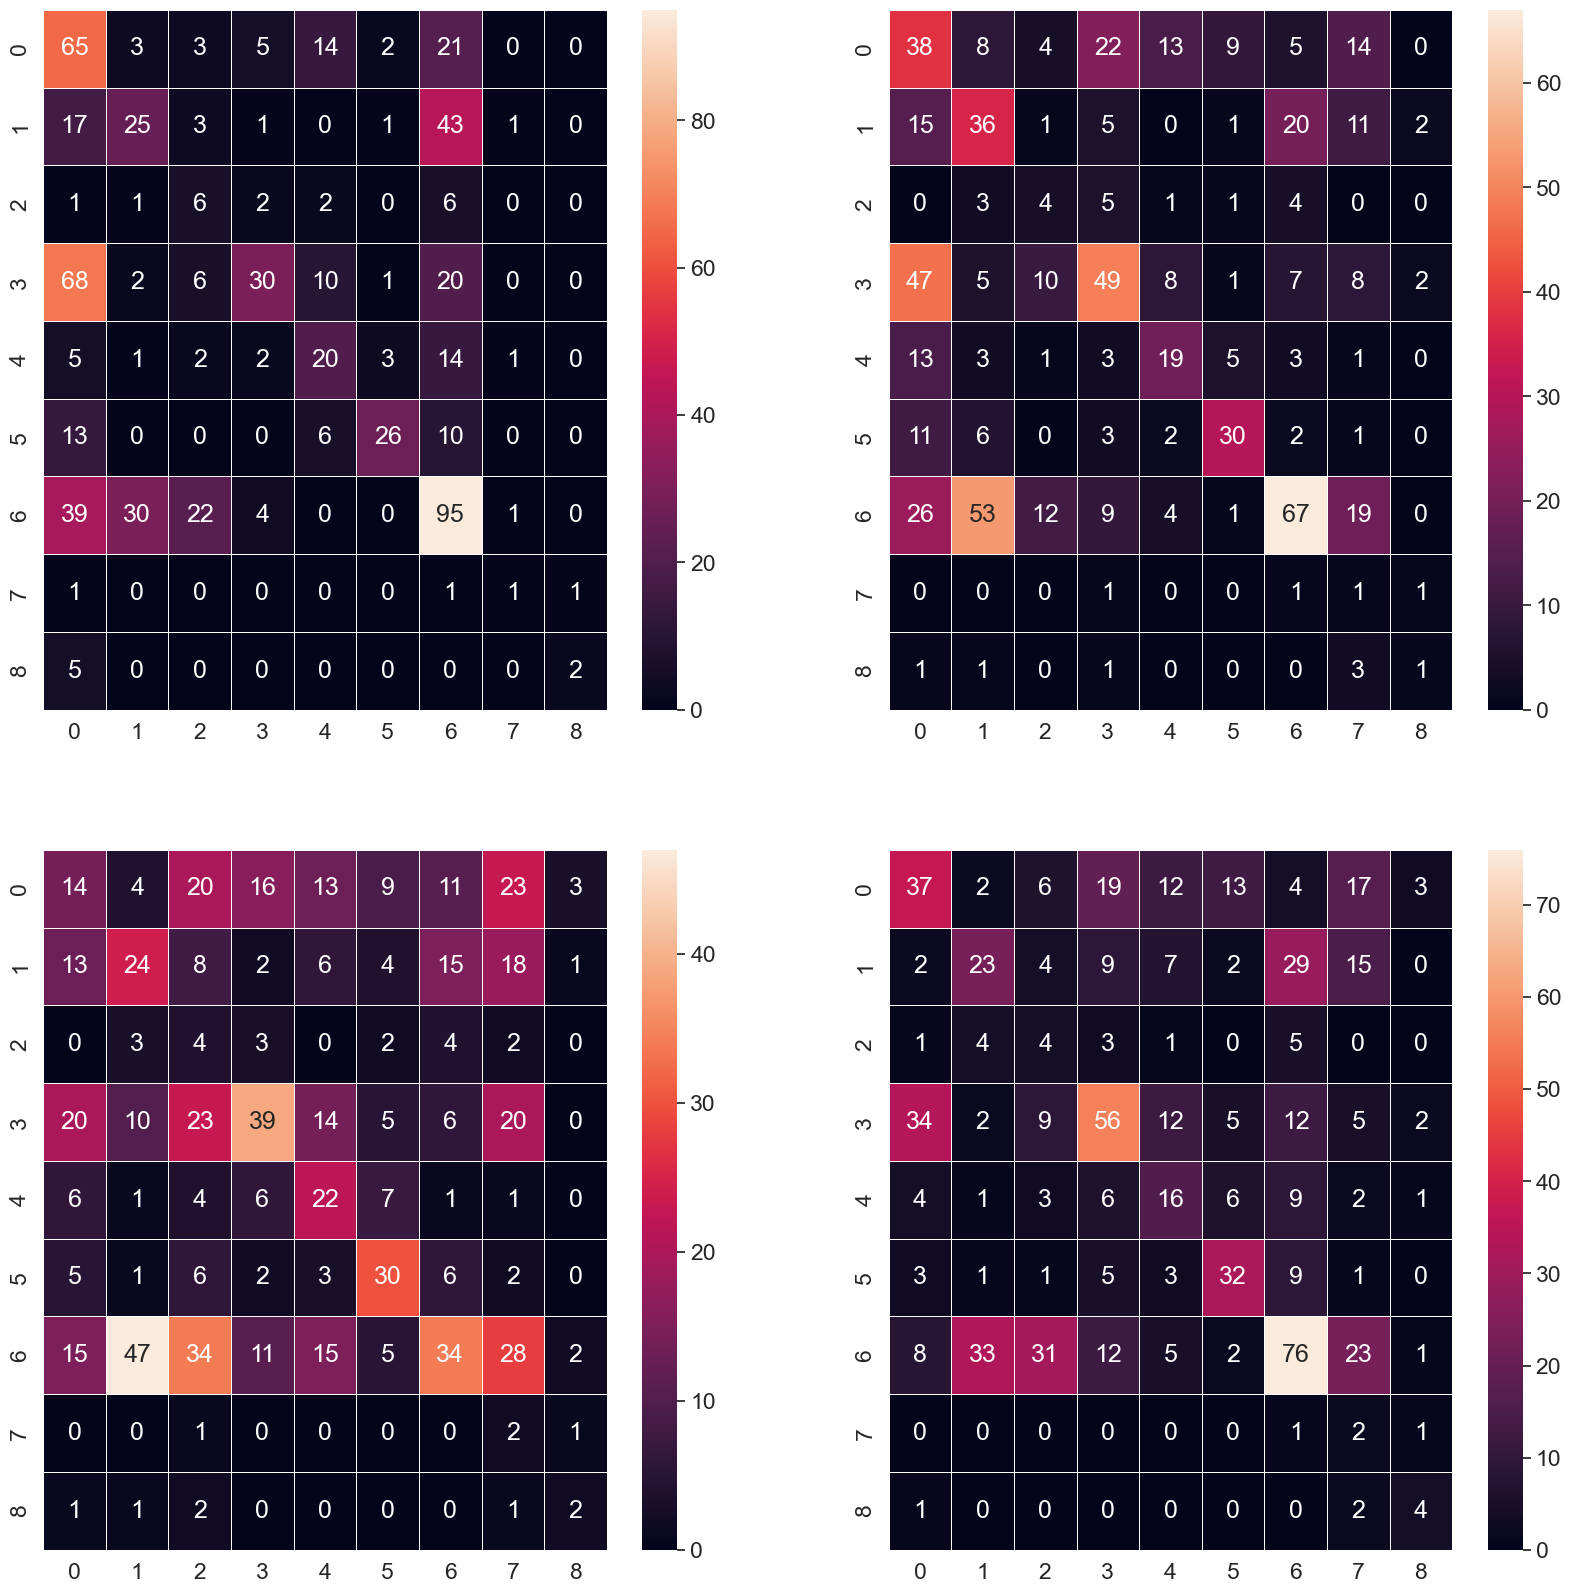

In [24]:
selected_classifiers = [
    model_svc,
    model_rf,
    model_gbc,
    model_mlp,
]

# subplots (2x2) confusion matrix for each classifier's predictions
import seaborn as sns
from sklearn.metrics import confusion_matrix

# set the font scale 1.5
sns.set(font_scale=1.5)


ax, fig = plt.subplots(2, 2, figsize=(20, 20))
for i, classifier in enumerate(selected_classifiers):
    print("Confusion matrix for classifier: ", classifier)
    cm = confusion_matrix(y_test, pred[classifier.__class__.__name__])
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=fig[i//2, i%2])

plt.savefig("img/baseline_models_confusion_matrix_UnderSampling.png", dpi=600)